In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('/Users/tonyjason/Downloads/bank.csv')
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
dataset['campaign'].unique()

array([ 1,  2,  3,  4,  6,  5,  8, 11,  9, 10, 15, 12, 14,  7, 24, 13, 17,
       29, 21, 20, 16, 32, 19, 25, 22, 43, 18, 41, 63, 27, 30, 26, 23, 28,
       33, 31])

In [5]:
#Dividing the data into categorical and numeric data
# Deposit is the dependent variable
category = ['job','marital','education','default','housing','loan','contact','month','poutcome']
numeric = ['age','balance','day','duration','campaign','pdays','previous']

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
#We'll check if any null values are present
# We can see that there are no null values
d = dataset.isnull().sum()
d

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
#converting all the categorical data to numerical values

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for each in category:
    dataset[each] = label_encoder.fit_transform(dataset[each])
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,yes
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,yes
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,yes
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,yes
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,yes


In [9]:
dataset["deposit"] = dataset['deposit'].map({'yes':1, 'no':0})
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [10]:
X = dataset.drop(['age','day','month','default','deposit'],axis=1).values
Y = dataset['deposit'].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [14]:
y_pred = classifier.predict(X_test)

/Users/tonyjason/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


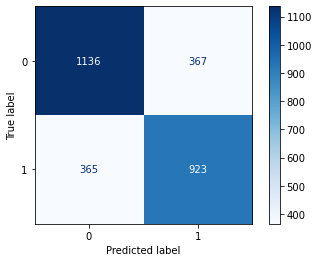

In [15]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1503
           1       0.72      0.72      0.72      1288

    accuracy                           0.74      2791
   macro avg       0.74      0.74      0.74      2791
weighted avg       0.74      0.74      0.74      2791



In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

ValueError: X has 2 features, but DecisionTreeClassifier is expecting 12 features as input.

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

ValueError: X has 2 features, but DecisionTreeClassifier is expecting 12 features as input.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

NameError: name 'y' is not defined

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [24]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

ValueError: X has 2 features, but DecisionTreeClassifier is expecting 12 features as input.

In [25]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

ValueError: X has 2 features, but DecisionTreeClassifier is expecting 12 features as input.

In [26]:

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8019


In [27]:

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(n_estimators=100,random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.8019


In [28]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8019


In [35]:
import numpy as np # linear algebra 
import copy # deep copies of objects -> estimators

#  estimator to ensemble with Adaboost:
from sklearn.tree import DecisionTreeClassifier

#  used for data handeling and visualisation
import pandas as pd # loading and transforming data
import matplotlib.pyplot as plt # visualisations
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # creating & visualising confusion matrices
from sklearn.model_selection import train_test_split



X_val=X_test
y_val=y_test

In [36]:
class AdaBoostClassifier():
    def __init__(self, base_estimator=True, n_estimators=50, learning_rate=1):
        if base_estimator:
            self.base_estimator = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
        else:
            self.base_estimator = base_estimator
            
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        
        self.estimators = None
        self.estimator_weights = None
        
        #  to track performance, not nesseccary for the algorithm
        self.total_errors = None
        self.training_error = None
        self.validation_error = None
        
    def fit(self, X, y, X_val=None, y_val=None):
        #  resetting lists 
        self.estimators = []
        self.estimator_weights = []
        self.total_errors = []
        self.training_error = []
        self.validation_error = []
        lr = self.learning_rate
        
        #  0) initialise equal weights
        sample_weights = np.full(len(X), 1/len(X))
        
        for est_i in range(self.n_estimators):
            #  1) fit weak learner
            estimator = copy.copy(self.base_estimator)
            estimator.fit(X, y, sample_weights)
            
            #  2) calculate total error
            prediction = estimator.predict(X)
            total_error = np.where(prediction != y, sample_weights, 0).sum() 
            
            #  3) determine weight / amount of say in final prediction
            amount_of_say = lr * 0.5 * np.log((1 - total_error)/(total_error + 1e-10))

            #  3.5) save estimator and it's weight before going into the next iteration
            self.estimators.append(estimator)
            self.estimator_weights.append(amount_of_say)
            
            #  4) update weights
            sample_weights = np.where(prediction != y, sample_weights * np.exp(amount_of_say), sample_weights * np.exp(-1 * amount_of_say))
            
            #  5) renormalize weights
            sample_weights = sample_weights / sample_weights.sum()
            
            #  5.5) keep track of total- and training-error over iterations for documentation purposes
            self.total_errors.append(total_error)
            self.training_error.append(np.where(self.predict(X) != y, 1, 0).sum()/len(X))
            if type(X_val) != "NoneType":
                self.validation_error.append(np.where(self.predict(X_val) != y_val, 1, 0).sum()/len(X_val))
    
    def predict(self, X, verbose=False):
        """
        * every estimator makes his predictions in the shape (len(X)) -> [a, b, ..., len(X)]
        * stack prediction of estimators to have them row wise(each row corresponds to a sample) -> [[a1, a2], [b1, b2], ..., len(X)]
        * at each row apply the weighted majority vote previously discussed
        """
        predictions = np.stack([estimator.predict(X) for estimator in self.estimators], axis=1) 
        weighted_majority_vote = lambda x: np.unique(x)[np.argmax([np.where(x==categ, self.estimator_weights, 0).sum() for categ in np.unique(x)])]
        return np.apply_along_axis(weighted_majority_vote, axis=1, arr=predictions)

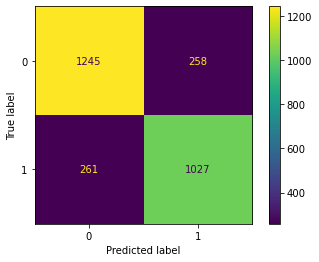

accuracy = 0.8140451451092798,
recall = 0.797360248447205,
precision = 0.7992217898832685,
f1-score = 0.7982899339292654


In [38]:
base = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4)

#  fit Adaboost classifier with 100 estimators
adaboost = AdaBoostClassifier(base_estimator=base, n_estimators=500, learning_rate=1)
adaboost.fit(X_train, y_train, X_val, y_val)

#  make predictions:
predictions = adaboost.predict(X_val)

#  confusion matrix
cm = confusion_matrix(y_val, predictions, labels=[0, 1])
cm_displ = ConfusionMatrixDisplay(cm)
cm_displ.plot()
plt.show()

#  calculate accuracy:
accuracy = np.mean(predictions==y_val)

#  calculate recall:
recall = cm[1, 1]/cm[1, :].sum() # of the total actual positives, how much were classified correctly

#  calculate precision:
precision = cm[1, 1]/cm[:, 1].sum() # of all predicted positives, how much were True positives

#  not that neccessary for this problem, but for the completeness:
f1 = 2 * ((recall * precision)/(recall + precision)) 

print(f"accuracy = {accuracy},\nrecall = {recall},\nprecision = {precision},\nf1-score = {f1}")


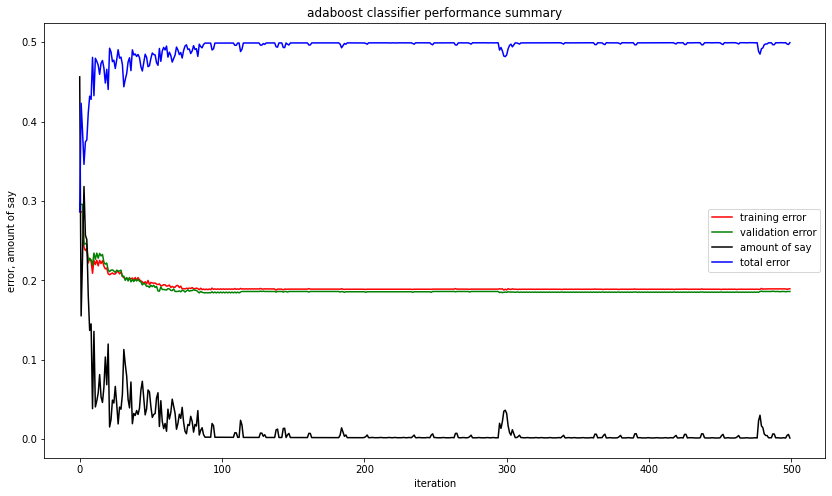

In [39]:
fig = plt.figure(figsize=(14, 8))

plt.plot(range(len(adaboost.training_error)), adaboost.training_error, color="red", label="training error")
plt.plot(range(len(adaboost.validation_error)), adaboost.validation_error, color="green", label="validation error")
plt.plot(range(len(adaboost.estimator_weights)), adaboost.estimator_weights, color="black", label="amount of say")
plt.plot(range(len(adaboost.total_errors)), adaboost.total_errors, color="blue", label="total error")

plt.xlabel("iteration")
plt.ylabel("error, amount of say")

plt.title("adaboost classifier performance summary")
plt.legend()
plt.show()